Analiza mieszkan na sprzedaz w OLX

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("../scraper/oferty_mieszkań.csv")
shape1 = df.shape

all_rows = shape1[0]
print(all_rows)

1300


In [35]:
shape2 = df.drop_duplicates().shape
rows_no_duplicates = shape2[0]
print(rows_no_duplicates)


1023


Number of duplicates

In [36]:
print(str(round(100.00 * (all_rows-rows_no_duplicates)/all_rows,2)) + "%")

21.31%


Price

C:\Users\pawel\AppData\Local\Temp\ipykernel_7104\35926873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], hist=True, kde=True,


(100000.0, 2000000.0)

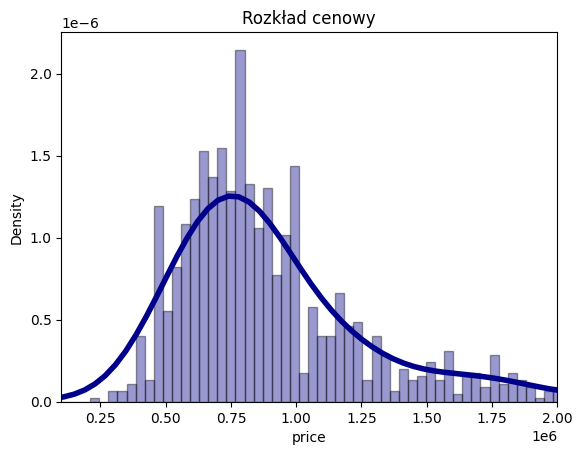

In [37]:
df['price'] = df['price'].astype(float)

fig, ax = plt.subplots()
sns.distplot(df['price'], hist=True, kde=True, 
             bins=int(200), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             ax = ax).set(title='Rozkład cenowy')
ax.set_xlim(100000,2000000)


In [38]:
price_median = round(np.median(df['price']))
print("MEDIAN : " + str(price_median))
price_average = round(np.average(df['price']))
print("AVERAGE : " + str(price_average))

MEDIAN : 829000
AVERAGE : 995640


Price per meter


C:\Users\pawel\AppData\Local\Temp\ipykernel_7104\2786811848.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_pm'], hist=True, kde=True,


(3000.0, 30000.0)

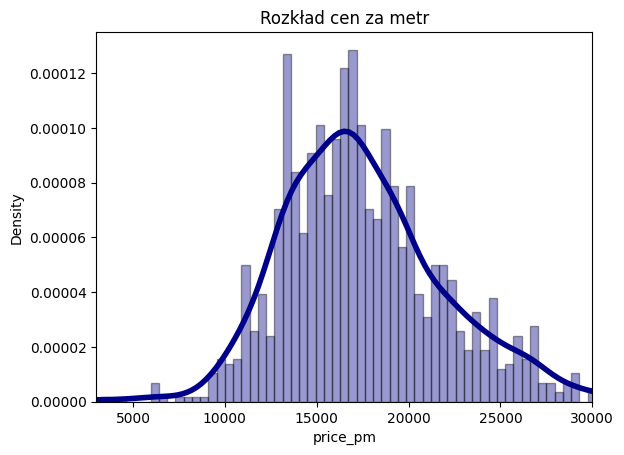

In [39]:
df['price_pm'] = df['price_pm'].astype(float)

fig, ax = plt.subplots()
sns.distplot(df['price_pm'], hist=True, kde=True, 
             bins=int(100), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             ax = ax).set(title='Rozkład cen za metr')
ax.set_xlim(3000,30000)

In [40]:
price_pm_median = round(np.median(df['price_pm']))
print("MEDIAN : " + str(price_pm_median))
price_pm_average = round(np.average(df['price_pm']))
print("AVERAGE : " + str(price_pm_average))

MEDIAN : 16994
AVERAGE : 17537


Size

C:\Users\pawel\AppData\Local\Temp\ipykernel_7104\2893333687.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['size'], hist=True, kde=True,


(10.0, 150.0)

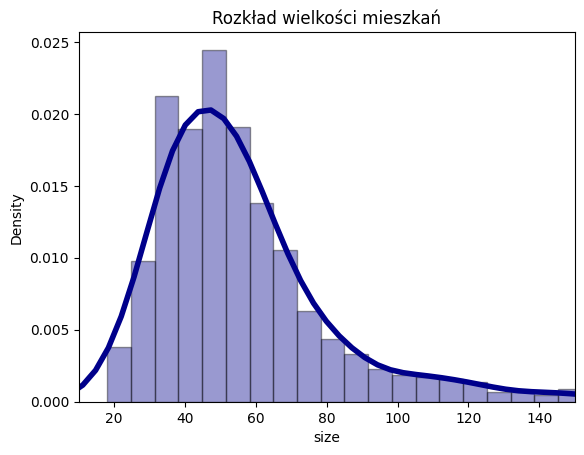

In [41]:
df['size'] = df['size'].astype(float)

fig, ax = plt.subplots()
sns.distplot(df['size'], hist=True, kde=True, 
             bins=int(100), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             ax = ax).set(title='Rozkład wielkości mieszkań')
ax.set_xlim(10,150)

In [42]:
size_median = round(np.median(df['size']),2)
print("MEDIAN : " + str(size_median))
size_average = round(np.average(df['size']),2)
print("AVERAGE : " + str(size_average))

MEDIAN : 51.0
AVERAGE : 57.68


<Axes: title={'center': 'Ilość ogłoszeń'}, xlabel='location'>

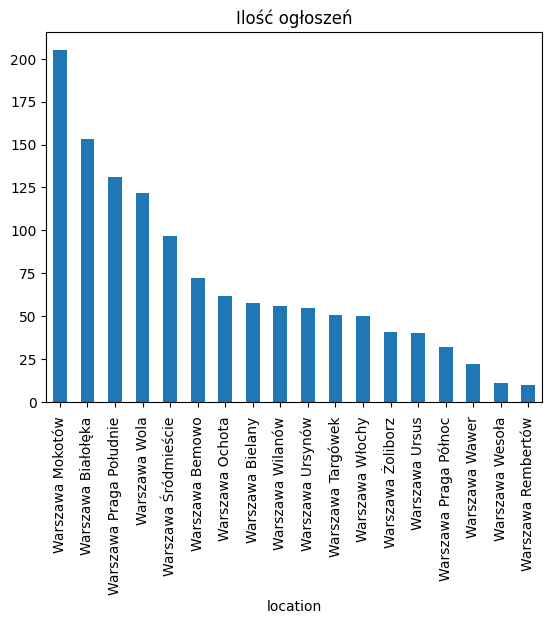

In [43]:
index = df[df['location'] == "Warszawa "].index
df.drop(index , inplace=True)

df['location'].value_counts().plot(kind='bar',title="Ilość ogłoszeń")

<Axes: title={'center': 'Cena mieszkania'}, xlabel='location'>

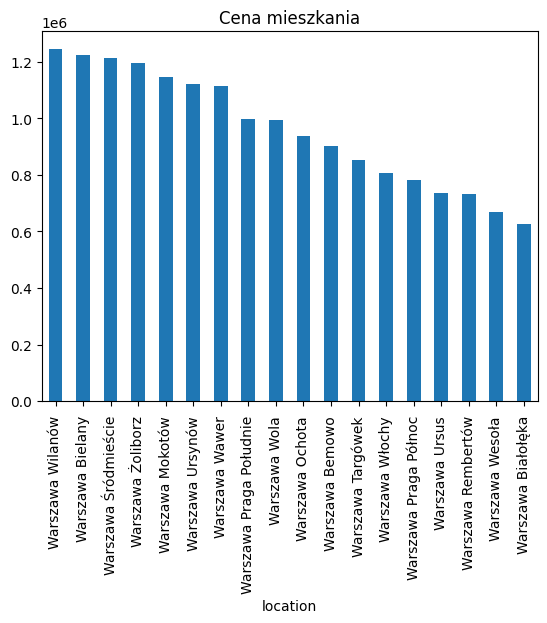

In [44]:
df.groupby(by = "location")['price'].mean().sort_values(ascending=False).plot(kind = "bar",title= "Cena mieszkania")

<Axes: title={'center': 'Cena za metr'}, xlabel='location'>

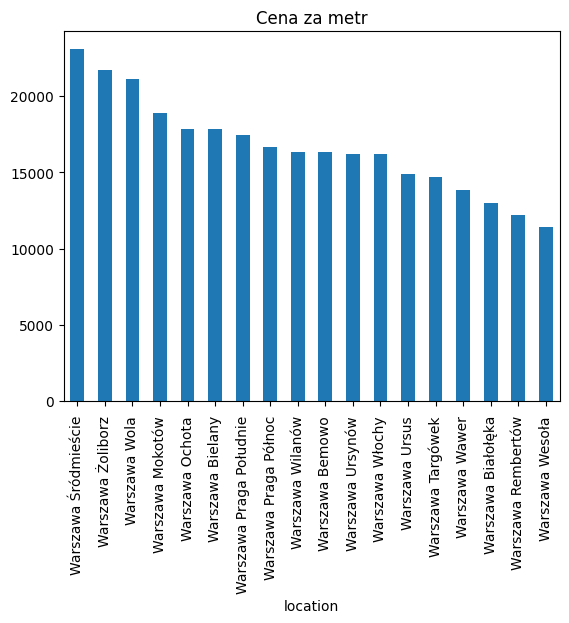

In [45]:
df.groupby(by = "location")['price_pm'].mean().sort_values(ascending=False).plot(kind = "bar",title = "Cena za metr")


<Axes: title={'center': 'Wielkość mieszkania'}, xlabel='location'>

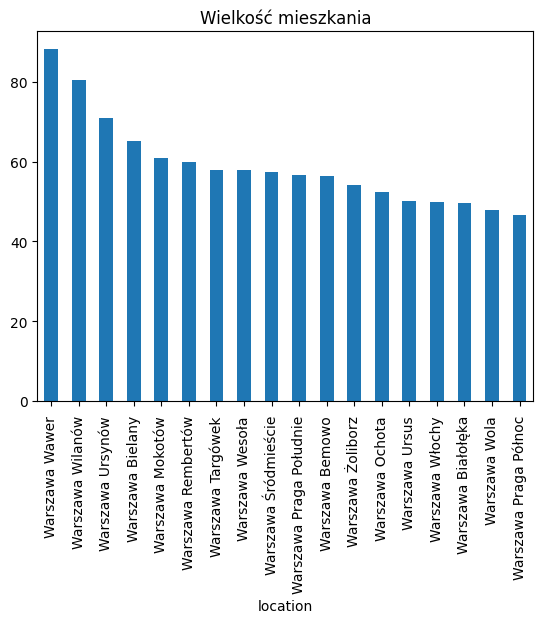

In [46]:
df.groupby(by = "location")['size'].mean().sort_values(ascending=False).plot(kind = "bar",title = "Wielkość mieszkania")

Save to the timetable

In [47]:
import csv,time
file_name = "timetable.csv"
time = time.time()
csv_file = open(file_name, 'a',newline = '',encoding="utf8")
writer = csv.writer(csv_file,delimiter = ',')
writer.writerow([time, rows_no_duplicates,price_median, price_average,price_pm_median,price_pm_average,size_median, size_average])
csv_file.close()
